In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


In [4]:

df = pd.read_csv("dataset.csv")
df.head()
df.shape

(520, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Index        520 non-null    int64  
 1   Date              520 non-null    object 
 2   Diesel_Price_NPR  520 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.3+ KB


In [6]:
df.isnull().sum()

Week_Index          0
Date                0
Diesel_Price_NPR    0
dtype: int64

In [7]:
#data cleaning
df = df.dropna() #remove missing values
df = df.drop_duplicates()
df["Diesel_Price_NPR"] = df["Diesel_Price_NPR"].astype(float)

EDA:PLOTTING

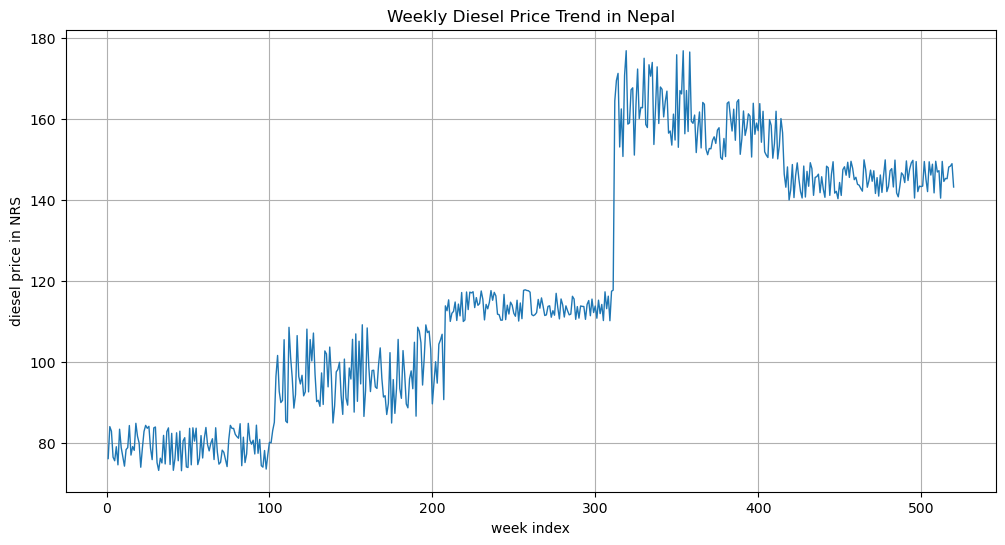

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df["Week_Index"], df["Diesel_Price_NPR"], linewidth=1)
plt.grid(True)
plt.xlabel("week index")
plt.ylabel("diesel price in NRS")
plt.title("Weekly Diesel Price Trend in Nepal")
plt.show()

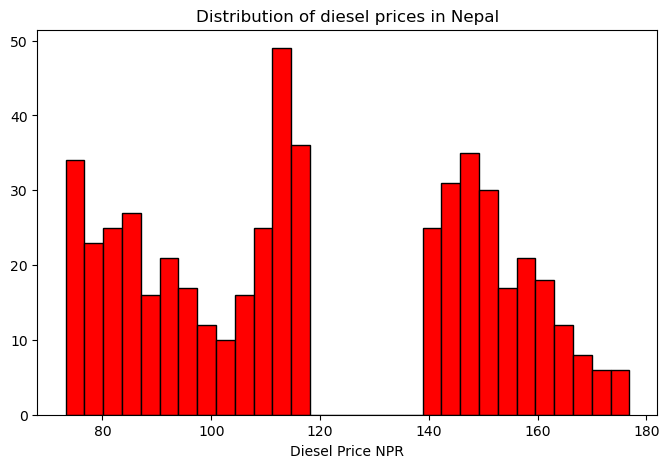

In [9]:
# adding histograms
plt.figure(figsize=(8,5))
plt.hist(df["Diesel_Price_NPR"], bins=30, color='red', edgecolor='black')
plt.xlabel("Diesel Price NPR")
plt.title("Distribution of diesel prices in Nepal")
plt.show()



In [10]:
x=df[["Week_Index"]]
y=df["Diesel_Price_NPR"]

In [11]:
df["Price_Up"] = (df["Diesel_Price_NPR"].diff() > 0).astype(int)
df

,Week_Index,Date,Diesel_Price_NPR,Price_Up
0,1,2016-01-18,76.23,0
1,2,2016-01-25,84.11,1
2,3,2016-02-01,82.97,0
3,4,2016-02-08,76.58,0
4,5,2016-02-15,75.69,0
...,...,...,...,...
515,516,2025-12-01,145.29,0
516,517,2025-12-08,148.16,1
517,518,2025-12-15,148.38,1
518,519,2025-12-22,148.99,1


In [12]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    shuffle=False
)


In [13]:
#linear regression

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

#train
model = LinearRegression()
model.fit(x_train,y_train)

#predict
y_predict = model.predict(x_test)

#evaluate
mae = mean_absolute_error(y_test, y_predict)
rmse = math.sqrt(mean_squared_error(y_test, y_predict))

print(f"MAE : ",mae)
print(f"RMSE : ",rmse)

MAE :  27.890719518222305
RMSE :  28.790257871306768


In [14]:
import numpy as np

x_values= x.values.flatten() #numpy 1d
future_weeks = np.arange(x_values.max() + 1, x_values.max() +156 +1)

future_weeks_df = pd.DataFrame(future_weeks, columns=["Week_Index"])
future_prices = model.predict(future_weeks_df)

start_week = x_values.max()

for i in range(10):
    print("Week",start_week+i+1, "Predicted prices : ",future_prices[i])
    

Week 521 Predicted prices :  185.42440562471245
Week 522 Predicted prices :  185.65723041501923
Week 523 Predicted prices :  185.890055205326
Week 524 Predicted prices :  186.1228799956328
Week 525 Predicted prices :  186.35570478593957
Week 526 Predicted prices :  186.58852957624632
Week 527 Predicted prices :  186.8213543665531
Week 528 Predicted prices :  187.05417915685985
Week 529 Predicted prices :  187.28700394716662
Week 530 Predicted prices :  187.5198287374734


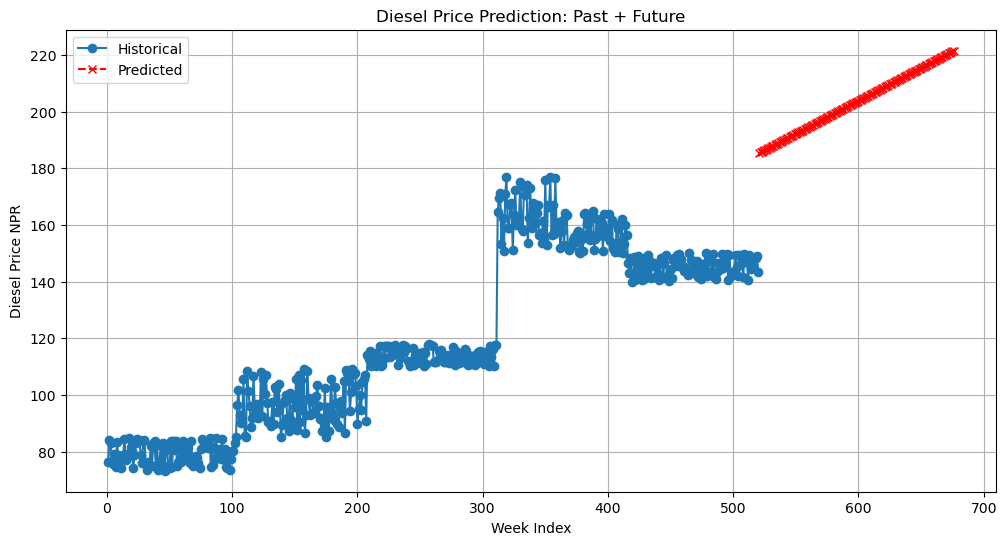

In [15]:
#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(x_values, y, label="Historical", marker='o')

plt.plot(future_weeks, future_prices, label="Predicted", color='red', linestyle='--', marker='x')

plt.xlabel("Week Index")
plt.ylabel("Diesel Price NPR")
plt.title("Diesel Price Prediction: Past + Future")
plt.legend()
plt.grid(True)

plt.show()

LOGISTIC

In [16]:
#creating binary for assump
y_binary = (y.diff() > 0).astype(int)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y_binary,
    test_size = 0.2,
    shuffle=False
)

In [18]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train,y_train)
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict = model2.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_predict))
print("Confusion metrix:",confusion_matrix(y_test,y_predict))


Accuracy: 0.5096153846153846
Confusion metrix: [[ 0 51]
 [ 0 53]]


In [23]:
##adding more 
df['Prev_Price'] =df['Diesel_Price_NPR'].shift(1).bfill()
df['Change_1w'] = df['Diesel_Price_NPR'] - df['Prev_Price']

df['For_3'] = df['Diesel_Price_NPR'].rolling(3).mean().bfill()

## for y
df['Target_Up'] = (df['Diesel_Price_NPR'].shift(-1) > df['Diesel_Price_NPR']).astype(int)



In [20]:
x = df[['Week_Index','Prev_Price','Change_1w','For_3']]
y = df['Target_Up']


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    shuffle=False
)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model2 =LogisticRegression()

model2.fit(x_train, y_train)
y_predict =model2.predict(x_test)


print("Accuracy: ",accuracy_score(y_test, y_predict))
print("CM : ", confusion_matrix(y_test, y_predict))



Accuracy:  0.6923076923076923
CM :  [[22 29]
 [ 3 50]]


In [24]:
from sklearn.metrics import precision_score, recall_score,f1_score

precision = precision_score(y_test, y_predict)
recall =recall_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.6329113924050633
Recall: 0.9433962264150944
F1-score: 0.7575757575757576
